# Lab 9
* **Name**: Utkarsh Prakash

## Title
Demostrate the working principle of autoencoders.

## Objective
* To train an autoencoder on MNIST dataset and test it using clean and noisy images.
* To understand the effect of dropouts on the performance of autoencoders.
* To train a denoising autoencoder and test it using clean and noisy images.

## Hypothesis:
* When a clean image is provided to the general autoencoder, then the network should be able to reconstruct the image properly.
* When a noisy version of the image is provided to the general autoencoder, then the network should not be able to reconstruct the clean image properly.
* When a clean image is provided to the denoising autoencoder, then the network should be able to reconstruct the image properly.
* When a noisy version of the image is provided to the denoising autoencoder, then the network should be able to reconstruct the clean image properly.

## Experimental Description:
1. **Data Generation:**
We use MNIST dataset for training and testing.


2. **Neural Network Architecture:**

![Autoencoder Architecture](tmp/Capture.PNG)

3. **Training and Cross Validation:**
    
    For training we use 55,000 images and for cross-validation we use 5,000 images. We use Keras Early Stopping Callback to stop the training if there is no improvement over validation loss for 10 consecutive epochs.
    

4. **Testing:**
    For testing we use 5,000 images.

## Implementation

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt 
import pandas as pd

In [2]:
# Loading MNIST data
mnist = tf.keras.datasets.mnist
(X_train_full, y_train_full), (X_test, y_test) = mnist.load_data()
X_train_full = np.expand_dims(X_train_full, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# Normalizing the images
X_train_full, X_test = X_train_full/255.0, X_test/255.0

# Creating Cross-validation data
X_val, X_train = X_train_full[:5000], X_train_full[5000:]
y_val, y_train = y_train_full[:5000], y_train_full[5000:]

X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

11493376/11490434 [==============================] - 0s 0us/step


((55000, 28, 28, 1),
 (55000,),
 (5000, 28, 28, 1),
 (5000,),
 (10000, 28, 28, 1),
 (10000,))

In [11]:
# Generating noisy versions of the images
X_train_noisy = X_train + 0.5*np.random.randn(X_train.shape[0], X_train.shape[1], X_train.shape[2], X_train.shape[3])
X_val_noisy = X_val + 0.5*np.random.randn(X_val.shape[0], X_val.shape[1], X_val.shape[2], X_val.shape[3])
X_test_noisy = X_test + 0.5*np.random.randn(X_test.shape[0], X_test.shape[1], X_test.shape[2], X_test.shape[3])

### Part 1: Autoencoder without Dropout

In [64]:
encoder = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
                tf.keras.layers.MaxPooling2D(2, 2),
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')
])
encoder.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 32)        4640      
Total params: 4,800
Trainable params: 4,800
Non-trainable params: 0
_________________________________________________________________


In [65]:
# Shape of the output from the encoder
encoder_output_shape = tuple(encoder.layers[-1].output.shape)[1:]

In [66]:
decoder = tf.keras.models.Sequential([
                tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=encoder_output_shape),
                tf.keras.layers.UpSampling2D(size=(2, 2)),
                tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
])
decoder.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 1)         289       
Total params: 9,537
Trainable params: 9,537
Non-trainable params: 0
_________________________________________________________________


In [67]:
# Autoencoder
auto_encoder = tf.keras.models.Sequential([encoder, decoder])
auto_encoder.compile(optimizer='adam', loss='mse')

In [68]:
# Instantiating Callback
early_stopping_callback = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

In [69]:
# Training the autoencoder
history = auto_encoder.fit(X_train, X_train, epochs=50,
                           validation_data=(X_val, X_val),
                           callbacks=[early_stopping_callback])

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0168 - val_loss: 9.7063e-04
Epoch 2/50
1719/1719 [==============================] - 6s 4ms/step - loss: 8.8553e-04 - val_loss: 7.2116e-04
Epoch 3/50
1719/1719 [==============================] - 6s 4ms/step - loss: 6.8790e-04 - val_loss: 5.8990e-04
Epoch 4/50
1719/1719 [==============================] - 6s 4ms/step - loss: 5.7779e-04 - val_loss: 5.0852e-04
Epoch 5/50
1719/1719 [==============================] - 6s 4ms/step - loss: 5.0069e-04 - val_loss: 4.5273e-04
Epoch 6/50
1719/1719 [==============================] - 6s 4ms/step - loss: 4.4682e-04 - val_loss: 4.1978e-04
Epoch 7/50
1719/1719 [==============================] - 6s 4ms/step - loss: 4.0816e-04 - val_loss: 3.8243e-04
Epoch 8/50
1719/1719 [==============================] - 6s 4ms/step - loss: 3.8016e-04 - val_loss: 3.6070e-04
Epoch 9/50
1719/1719 [==============================] - 6s 4ms/step - loss: 3.5488e-04 - val_loss: 3.4607e-04
Epoch 10/50
17

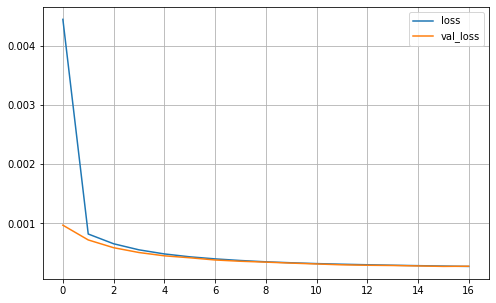

In [70]:
# Plotting accuracy, loss vs Epochs
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

#### Testing the autoencoder with clean images

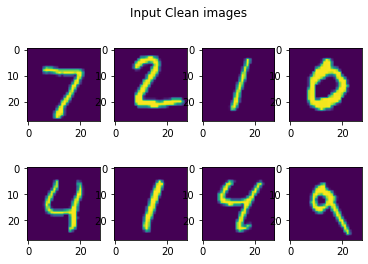

In [25]:
f, axarr = plt.subplots(2,4)
f.suptitle("Input Clean images")

for i in range(8):
    axarr[i//4, i%4].imshow(X_test[i, :, :, 0])
    axarr[i//4, i%4].grid(False)

#### Output from the autoencoder

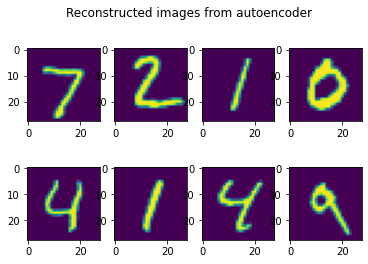

In [27]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from autoencoder")

for i in range(8):
    auto_encoder_output = auto_encoder.predict(np.expand_dims(X_test[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(auto_encoder_output[0, :, :, 0])
    axarr[i//4, i%4].grid(False)

#### Noisy version of the images

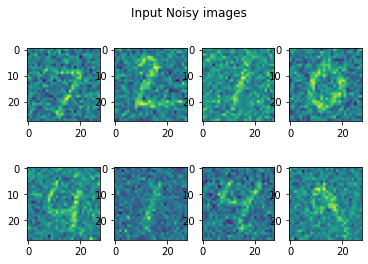

In [28]:
f, axarr = plt.subplots(2,4)
f.suptitle("Input Noisy images")

for i in range(8):
    axarr[i//4, i%4].imshow(X_test_noisy[i, :, :, 0])
    axarr[i//4, i%4].grid(False)

#### Output from the autoencoder

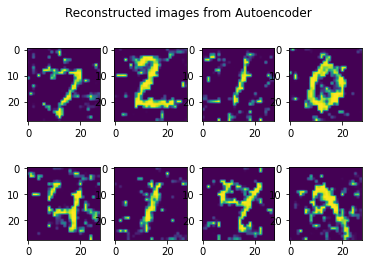

In [29]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from Autoencoder")

for i in range(8):
    auto_encoder_output = auto_encoder.predict(np.expand_dims(X_test_noisy[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(auto_encoder_output[0, :, :, 0])
    axarr[i//4, i%4].grid(False)

### Part 2: Autoencoder with Dropout

In [71]:
dropout_encoder = tf.keras.models.Sequential([
                    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
                    tf.keras.layers.MaxPooling2D(2, 2),
                    tf.keras.layers.Dropout(rate=0.2),
                    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')
])
encoder.summary()

Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 14, 14, 32)        4640      
Total params: 4,800
Trainable params: 4,800
Non-trainable params: 0
_________________________________________________________________


In [72]:
# Shape of the output from the encoder
dropout_encoder_output_shape = tuple(dropout_encoder.layers[-1].output.shape)[1:]

In [73]:
dropout_decoder = tf.keras.models.Sequential([
                    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=dropout_encoder_output_shape),
                    tf.keras.layers.UpSampling2D(size=(2, 2)),
                    tf.keras.layers.Dropout(rate=0.2),
                    tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
])
decoder.summary()

Model: "sequential_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_22 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_5 (UpSampling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 28, 28, 1)         289       
Total params: 9,537
Trainable params: 9,537
Non-trainable params: 0
_________________________________________________________________


In [74]:
dropout_auto_encoder = tf.keras.models.Sequential([encoder, decoder])
dropout_auto_encoder.compile(optimizer='adam', loss='mse')

In [75]:
# Instantiating Callback
early_stopping_callback = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

In [76]:
history = dropout_auto_encoder.fit(X_train, X_train, epochs=50,
                           validation_data=(X_val, X_val),
                           callbacks=[early_stopping_callback])

Epoch 1/50
1719/1719 [==============================] - 7s 4ms/step - loss: 3.0476e-04 - val_loss: 2.6854e-04
Epoch 2/50
1719/1719 [==============================] - 6s 3ms/step - loss: 2.6909e-04 - val_loss: 2.6801e-04
Epoch 3/50
1719/1719 [==============================] - 6s 3ms/step - loss: 2.6503e-04 - val_loss: 2.5966e-04
Epoch 4/50
1719/1719 [==============================] - 6s 4ms/step - loss: 2.5941e-04 - val_loss: 2.6309e-04


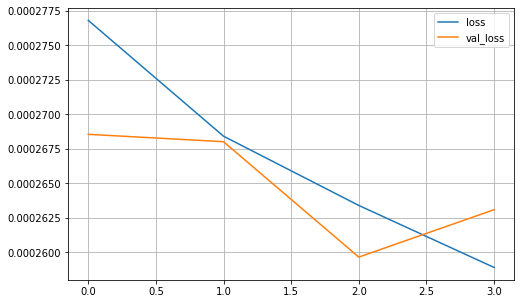

In [77]:
# Plotting accuracy, loss vs Epochs
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

#### Testing with clean images

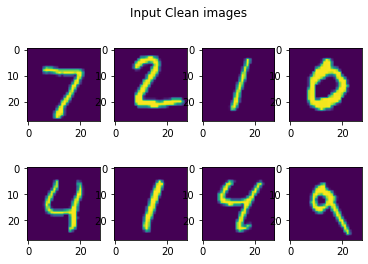

In [30]:
f, axarr = plt.subplots(2,4)
f.suptitle("Input Clean images")

for i in range(8):
    axarr[i//4, i%4].imshow(X_test[i, :, :, 0])
    axarr[i//4, i%4].grid(False)

#### Output from the autoencoder

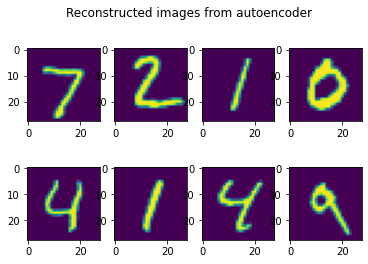

In [32]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from autoencoder")

for i in range(8):
    dropout_auto_encoder_output = dropout_auto_encoder.predict(np.expand_dims(X_test[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(dropout_auto_encoder_output[0, :, :, 0])
    axarr[i//4, i%4].grid(False)

#### Testing with Noisy version of the image

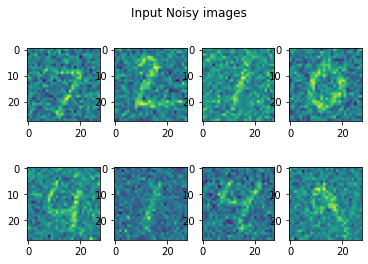

In [33]:
f, axarr = plt.subplots(2,4)
f.suptitle("Input Noisy images")

for i in range(8):
    axarr[i//4, i%4].imshow(X_test_noisy[i, :, :, 0])
    axarr[i//4, i%4].grid(False)

#### Output from the autoencoder

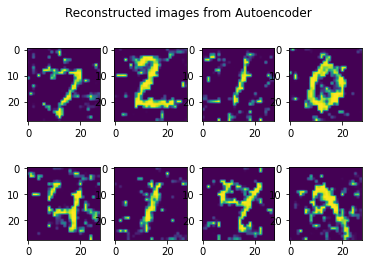

In [35]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from Autoencoder")

for i in range(8):
    dropout_auto_encoder_output = dropout_auto_encoder.predict(np.expand_dims(X_test_noisy[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(dropout_auto_encoder_output[0, :, :, 0])
    axarr[i//4, i%4].grid(False)

### Part 3: Denoising Autoencoder

In [50]:
denoise_encoder = tf.keras.models.Sequential([
                    tf.keras.layers.Conv2D(16, kernel_size=(3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)),
                    tf.keras.layers.MaxPooling2D(2, 2),
                    tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same')
])
denoise_encoder.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 14, 14, 32)        4640      
Total params: 4,800
Trainable params: 4,800
Non-trainable params: 0
_________________________________________________________________


In [51]:
denoise_encoder_output_shape = tuple(denoise_encoder.layers[-1].output.shape)[1:]

In [52]:
denoise_decoder = tf.keras.models.Sequential([
                      tf.keras.layers.Conv2D(32, kernel_size=(3, 3), activation='relu', padding='same', input_shape=denoise_encoder_output_shape),
                      tf.keras.layers.UpSampling2D(size=(2, 2)),
                      tf.keras.layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')
])
denoise_decoder.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_14 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
up_sampling2d_3 (UpSampling2 (None, 28, 28, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 28, 28, 1)         289       
Total params: 9,537
Trainable params: 9,537
Non-trainable params: 0
_________________________________________________________________


In [53]:
denoise_auto_encoder = tf.keras.models.Sequential([denoise_encoder, denoise_decoder])
denoise_auto_encoder.compile(optimizer='adam', loss='mse')

In [54]:
# Instantiating Callback
early_stopping_callback = keras.callbacks.EarlyStopping(patience=1, restore_best_weights=True)

In [55]:
history = denoise_auto_encoder.fit(X_train_noisy, X_train, epochs=50,
                           validation_data=(X_val_noisy, X_val),
                           callbacks=[early_stopping_callback])

Epoch 1/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0393 - val_loss: 0.0112
Epoch 2/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0112 - val_loss: 0.0106
Epoch 3/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0107 - val_loss: 0.0103
Epoch 4/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0104 - val_loss: 0.0101
Epoch 5/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0102 - val_loss: 0.0101
Epoch 6/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0101 - val_loss: 0.0099
Epoch 7/50
1719/1719 [==============================] - 6s 3ms/step - loss: 0.0100 - val_loss: 0.0099
Epoch 8/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0100 - val_loss: 0.0098
Epoch 9/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.0099 - val_loss: 0.0098
Epoch 10/50
1719/1719 [==============================] - 6s 4ms/step - loss: 0.009

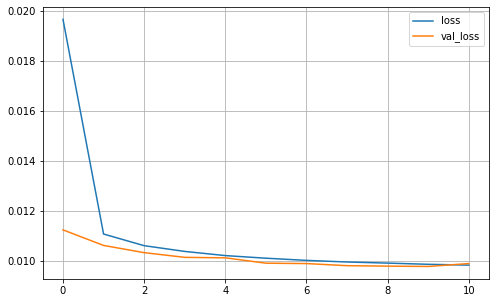

In [56]:
# Plotting accuracy, loss vs Epochs
pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.show()

#### Testing with noisy version of the images

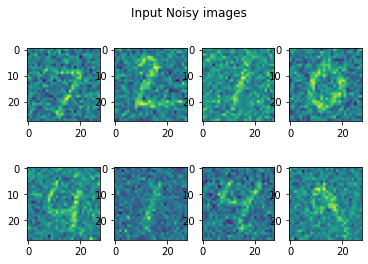

In [43]:
f, axarr = plt.subplots(2,4)
f.suptitle("Input Noisy images")

for i in range(8):
    axarr[i//4, i%4].imshow(X_test_noisy[i, :, :, 0])
    axarr[i//4, i%4].grid(False)

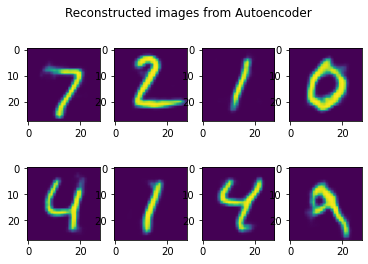

In [44]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from Autoencoder")

for i in range(8):
    auto_encoder_output = denoise_auto_encoder.predict(np.expand_dims(X_test_noisy[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(auto_encoder_output[0, :, :, 0])
    axarr[i//4, i%4].grid(False)

#### Testing with clean images

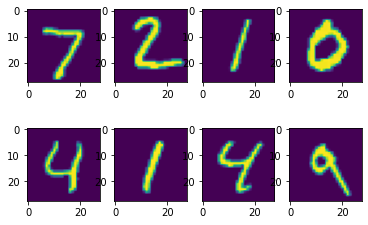

In [ ]:
f, axarr = plt.subplots(2,4)
f.suptitle("Input Clean images")

for i in range(8):
    axarr[i//4, i%4].imshow(X_test[i, :, :, 0])
    axarr[i//4, i%4].grid(False)

#### Output from the autoencoder

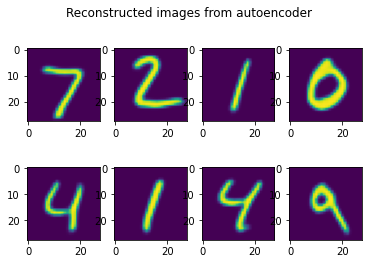

In [42]:
figure, axarr = plt.subplots(2, 4)
figure.suptitle("Reconstructed images from autoencoder")

for i in range(8):
    auto_encoder_output = denoise_auto_encoder.predict(np.expand_dims(X_test[i, :, :, :], axis=0))
    axarr[i//4, i%4].imshow(auto_encoder_output[0, :, :, 0])
    axarr[i//4, i%4].grid(False)

## Observations and Conclusions
* When a clean image is provided to the general autoencoder, then the network is able to reconstruct the image properly.
* When a noisy version of the image is provided to the general autoencoder, then the network is not be able to reconstruct the clean image properly.
* When a clean image is provided to the denoising autoencoder, then the network is able to reconstruct the image properly.
* When a noisy version of the image is provided to the denoising autoencoder, then the network is able to reconstruct the clean image properly.
* There doesn't seem to be much effect of dropouts on the performance of the network. This may be attributed to the fact that our encoder and decoder networks are shallow.

## References
1. Deep Learning by Ian Goodfellow, Yoshua Bengio and Aaron Courville, 2016
2. Hands-on Machine Learning with Scikit-Learn, Keras and TensorFlow by Aurelien Geron, 2019
3. http://alexlenail.me/NN-SVG/LeNet.html for plotting the CNN architecture.